In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadr
import rdata
import matplotlib as plt

# Análise de Correspondência Múltipla

**Técnica Não Supervisionada**

Exemplo da aula do MBA DSA USP/ESALQ com Prof. Wilson Tarantin Jr.

Fonte: Fávero e Belfiore, MANUAL DE ANÁLISE DE DADOS, Capítulo 11

- Referência: https://www.kaggle.com/code/jiagengchang/heart-disease-multiple-correspondence-analysis/notebook

- Documentação: https://pypi.org/project/prince/#correspondence-analysis-ca


### Aplicabilidade

Técnica adequada para a análise de variáveis qualitativas.

>Verificar se existe associação estatisticamente significativa entre as variáveis e suas categorias. <br>

>Verificar como as categorias se associam entre elas.

>Construção do mapa perceptual para visualizar essas associações.

<b>Para variáveis quantitativas é necessários transformá-las em variáveis categóricas. Criando faixas/categorias.</b>


### Objetivo da Análise

Verificar as associações entre o perfil, o tipo de investimento e estado civil entre os 100 estudantes analisados.

In [3]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\perfil_investidor_aplicacao_estadocivil.RData')

#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['perfil_investidor_aplicacao_estadocivil'])


In [4]:
#Transforma o objeto em um pandas DataFrame
perfil_investidor = rData['perfil_investidor_aplicacao_estadocivil']

In [5]:
perfil_investidor

,estudante,perfil,aplicacao,estado_civil
0,Gabriela,Conservador,Poupanca,Casado
1,Luiz Felipe,Conservador,Poupanca,Casado
2,Patrícia,Conservador,Poupanca,Casado
3,Gustavo,Conservador,Poupanca,Solteiro
4,Letícia,Conservador,Poupanca,Casado
...,...,...,...,...
95,Sheila,Agressivo,Acoes,Solteiro
96,Pedro,Agressivo,Acoes,Solteiro
97,Horácio,Agressivo,Acoes,Solteiro
98,Leandro,Agressivo,Acoes,Solteiro


## Análise Descritiva

In [6]:
#Análise Descritiva
perfil_investidor.describe()

,estudante,perfil,aplicacao,estado_civil
count,100,100,100,100
unique,100,3,3,2
top,Gabriela,Agressivo,Acoes,Solteiro
freq,1,58,45,57


<AxesSubplot:title={'center':'Perfil'}, ylabel='Count'>

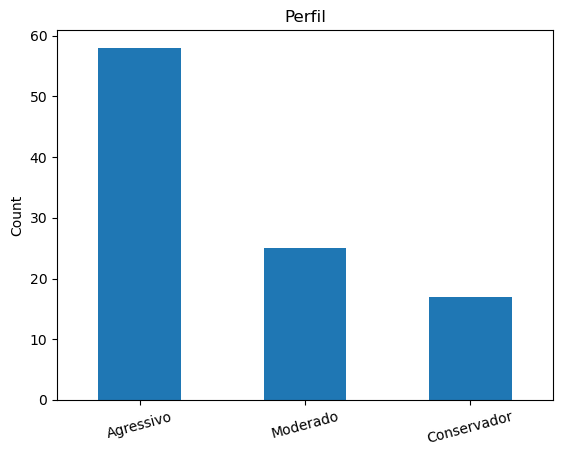

In [7]:
perfil_investidor.perfil.value_counts().plot(kind="bar",
                           title="Perfil",
                           rot=15,
                           #xlabel="perfil",
                           ylabel="Count")

<AxesSubplot:title={'center':'Aplicacao'}, ylabel='Count'>

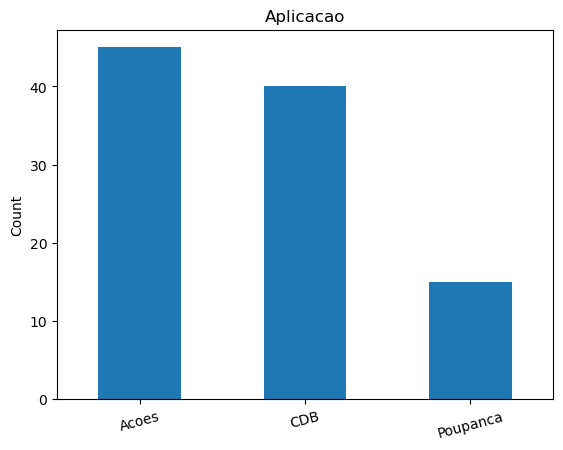

In [8]:
perfil_investidor.aplicacao.value_counts().plot(kind="bar",
                           title="Aplicacao",
                           rot=15,
                           #xlabel="Aplicacao",
                           ylabel="Count")

<AxesSubplot:title={'center':'Estado Civil'}, ylabel='Count'>

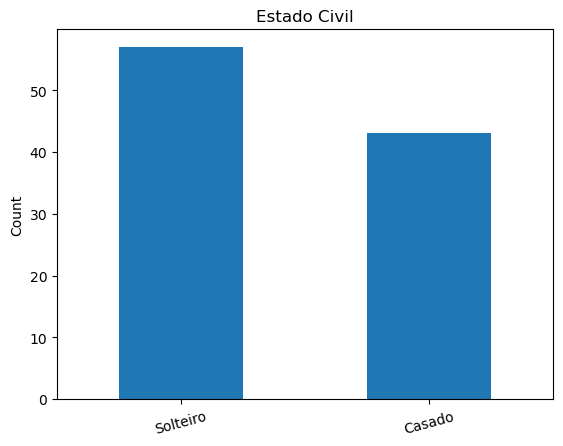

In [9]:
perfil_investidor.estado_civil.value_counts().plot(kind="bar",
                           title="Estado Civil",
                           rot=15,
                           #xlabel="Estado Civil",
                           ylabel="Count")

# Análise da Significância Estatística Para Análise de Correspondência Múltipla

Teste de associação qui-quadrado para avaliar a significância para pares de variáveis.

**Deve-se aplicar o teste qui-quadrado para cada combinação de pares das variáveis.**

- Aplicação X Perfil
- Aplicação X Estado Civil
- Perfil X Estados Civil

Soma das estatísticas qui2 individuais para cada par de variável. <br>
A partir da estatística qui2 total testaremos as hipóteses:

> H0: não existe associação entre as variáveis <br>
> H1: existe associação entre as variáveis

p-valor < 0,05 rejeita H0.

**Caso alguma variável não tenha associação estatisticamente significativa com pelo menos uma outra, essa variável deve ser retirada da análise.**

### Aplicação X Perfil

In [10]:
#Criando tabela de contingência
tabela_contingencia_AP = pd.crosstab(perfil_investidor['perfil'],
                                 perfil_investidor['aplicacao'])
tabela_contingencia_AP

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,36,20,2
Conservador,5,4,8
Moderado,4,16,5


In [11]:
# Calculando QUI2

from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(tabela_contingencia_AP)

print(f'qui2: {c:.3f}, df: {dof}, p-value: {p:.3f}')

qui2: 31.764, df: 4, p-value: 0.000


### Aplicação X Estado Civil

In [12]:
#Criando tabela de contingência
tabela_contingencia_AE = pd.crosstab(perfil_investidor['aplicacao'],
                                 perfil_investidor['estado_civil'])
tabela_contingencia_AE

estado_civil,Casado,Solteiro
aplicacao,,
Acoes,9,36
CDB,24,16
Poupanca,10,5


In [13]:
# Calculando QUI2

from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(tabela_contingencia_AE)

print(f'qui2: {c:.3f}, df: {dof}, p-value: {p:.3f}')

qui2: 17.857, df: 2, p-value: 0.000


### Perfil X Estado Civil

In [14]:
#Criando tabela de contingência
tabela_contingencia_PE = pd.crosstab(perfil_investidor['perfil'],
                                 perfil_investidor['estado_civil'])
tabela_contingencia_PE

estado_civil,Casado,Solteiro
perfil,,
Agressivo,17,41
Conservador,12,5
Moderado,14,11


In [15]:
# Calculando QUI2

from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(tabela_contingencia_PE)

print(f'qui2: {c:.3f}, df: {dof}, p-value: {p:.3f}')

qui2: 11.438, df: 2, p-value: 0.003


# Análise dos Resíduos Padronizados Ajustados

Verificamos que existe a associação entre os pares de variáveis através do qui-quadrado mas ainda não sabemos de onde essa associação está vindo.

Para avaliar de onde vem a associação, utilizamos o Resíduos Padronizado Ajustado > 1.96

Aplicaremos o módulo statsmodels.api 


### Heatmap Aplicação X Perfil

<AxesSubplot:xlabel='aplicacao', ylabel='perfil'>

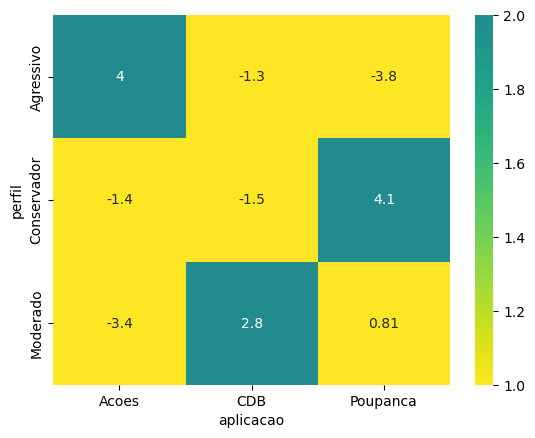

In [16]:
import statsmodels.api as sm

# Resíduos Padronizados Ajustados
tabela = sm.stats.Table(tabela_contingencia_AP)

#Heatmap
sns.heatmap(tabela.standardized_resids,
           cmap='viridis_r',
           annot=True,
           center=1.96,
           vmin=1,
           vmax=2,
           robust=True)


Existe Associação entre as categorias:

- Agressivo e Ações
- Conservador e Poupança
- Moderado e CDB

### Heatmap Aplicação X Estado Civil

<AxesSubplot:xlabel='estado_civil', ylabel='aplicacao'>

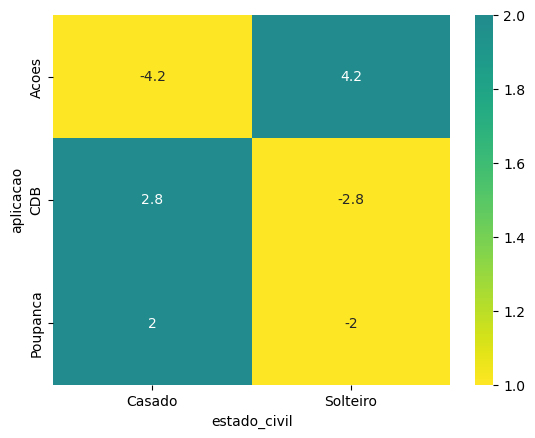

In [17]:
# Resíduos Padronizados Ajustados
tabela = sm.stats.Table(tabela_contingencia_AE)

#Heatmap
sns.heatmap(tabela.standardized_resids,
           cmap='viridis_r',
           annot=True,
           center=1.96,
           vmin=1,
           vmax=2,
           robust=True)

Existe Associação entre as categorias:

- Casado e CDB
- Casado e Poupança
- Solteiro e Ações

### Heatmap Perfil X Estado Civil

<AxesSubplot:xlabel='estado_civil', ylabel='perfil'>

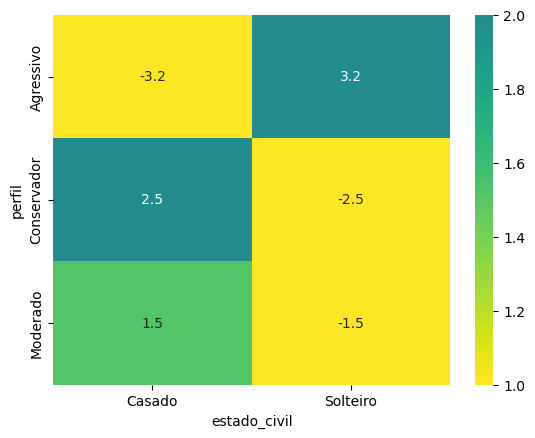

In [18]:
# Resíduos Padronizados Ajustados
tabela = sm.stats.Table(tabela_contingencia_PE)

#Heatmap
sns.heatmap(tabela.standardized_resids,
           cmap='viridis_r',
           annot=True,
           center=1.96,
           vmin=1,
           vmax=2,
           robust=True)

Existe Associação entre as categorias:

- Casado e Conservador
- Solteiro e Agressivo

# Matriz Binária e Matriz de Burt

Tem como objetivo agregar todas as tabelas de contingência em uma única grande tabela.

## Matriz Binária

Transformar as variáveis em valores 1 ou 0 (variáveis dummys).

**Quantidade de Dimensões = J - Q = #Categorias - #Variáveis = 8 - 3 = 5**

In [19]:
matrizBinaria = pd.get_dummies(perfil_investidor.iloc[:,1:])

In [20]:
matrizBinaria

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado_civil_Casado,estado_civil_Solteiro
0,0,1,0,0,0,1,1,0
1,0,1,0,0,0,1,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,0,1,0,1
4,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1
96,1,0,0,1,0,0,0,1
97,1,0,0,1,0,0,0,1
98,1,0,0,1,0,0,0,1


## Matriz de Burt

Definida como B = Z' * Z <br>

ou seja,

Matriz Binária Transposta vezes Matriz Binária

In [21]:
matrizBurt = np.dot(matrizBinaria.T, matrizBinaria)
matrizBurt = pd.DataFrame(matrizBurt, 
                          index=matrizBinaria.columns,
                          columns=matrizBinaria.columns)

In [22]:
matrizBurt.head(100)

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado_civil_Casado,estado_civil_Solteiro
perfil_Agressivo,58,0,0,36,20,2,17,41
perfil_Conservador,0,17,0,5,4,8,12,5
perfil_Moderado,0,0,25,4,16,5,14,11
aplicacao_Acoes,36,5,4,45,0,0,9,36
aplicacao_CDB,20,4,16,0,40,0,24,16
aplicacao_Poupanca,2,8,5,0,0,15,10,5
estado_civil_Casado,17,12,14,9,24,10,43,0
estado_civil_Solteiro,41,5,11,36,16,5,0,57


# Análise de Correspondência Múltipla

Prince utiliza a Matriz de Burt para gerar as Coordenadas

In [24]:
import prince

# O módulo prince utiliza a base original de forma direta (já cria a matriz de burt)
variaveis = perfil_investidor.iloc[:,1:]

#Calculondo qtde de autovalores:
# J - Q
n = matrizBinaria.columns.size - variaveis.columns.size

mca = prince.MCA(n_components=n,
                engine='auto')
#print('Autovalores:', n)

In [25]:
# Treina o modelo

mca = mca.fit(variaveis)

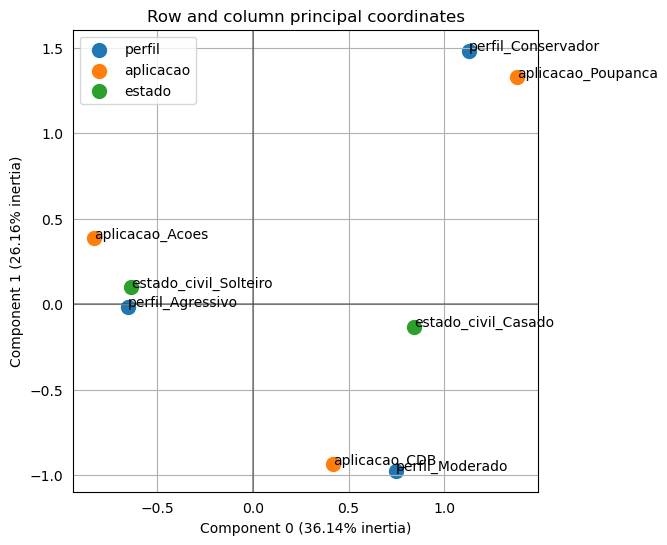

In [26]:
#Plota o mapa Perceptual
ax = mca.plot_coordinates(variaveis,
                         ax=None,
                         show_row_points=False,
                         show_column_labels=True,
                         column_points_size = 100,)

Por se tratar de uma análise onde geram-se 5 dimensões, temos 5 coordenadas sendo as duas primeiras
X e Y.

In [27]:
mca.column_coordinates(variaveis).round(3)

,0,1,2,3,4
perfil_Agressivo,-0.653,-0.015,-0.343,-0.161,0.392
perfil_Conservador,1.130,1.484,-0.482,0.834,-0.691
perfil_Moderado,0.747,-0.975,1.123,-0.193,-0.440
aplicacao_Acoes,-0.831,0.388,0.058,-0.358,-0.499
aplicacao_CDB,0.417,-0.935,-0.401,0.512,0.168
aplicacao_Poupanca,1.381,1.331,0.895,-0.291,1.049
estado_civil_Casado,0.843,-0.131,-0.541,-0.542,-0.108
estado_civil_Solteiro,-0.636,0.099,0.408,0.409,0.082


Também são gerados 5 autovalores, sendo que utilizaremos os dois primeiros totalizando 62,3% da variância total explicada.

In [28]:
# Inércias Principais (autovalores)
mca.eigenvalues_

[0.6023045112620058,
 0.4359878227115962,
 0.276472758068741,
 0.17983707198690146,
 0.1720645026374225]

In [29]:
#Percentual de variância explicada por dimensão
mca.explained_inertia_

[0.36138270675720346,
 0.2615926936269577,
 0.1658836548412446,
 0.10790224319214087,
 0.1032387015824535]

In [30]:
# Massas das colunas
mca.col_masses_

perfil_Agressivo         0.193333
perfil_Conservador       0.056667
perfil_Moderado          0.083333
aplicacao_Acoes          0.150000
aplicacao_CDB            0.133333
aplicacao_Poupanca       0.050000
estado_civil_Casado      0.143333
estado_civil_Solteiro    0.190000
dtype: float64

### A partir de variáveis qualitativas, geramos variáveis quantitativas.

#### Abaixo temos as coordenadas para cada observação.

In [31]:
mca.row_coordinates(variaveis).round(3)

,0,1,2,3,4
0,1.441,1.355,-0.081,0.001,0.201
1,1.441,1.355,-0.081,0.001,0.201
2,1.441,1.355,-0.081,0.001,0.201
3,0.805,1.471,0.521,0.748,0.354
4,1.441,1.355,-0.081,0.001,0.201
...,...,...,...,...,...
95,-0.911,0.238,0.078,-0.087,-0.020
96,-0.911,0.238,0.078,-0.087,-0.020
97,-0.911,0.238,0.078,-0.087,-0.020
98,-0.911,0.238,0.078,-0.087,-0.020


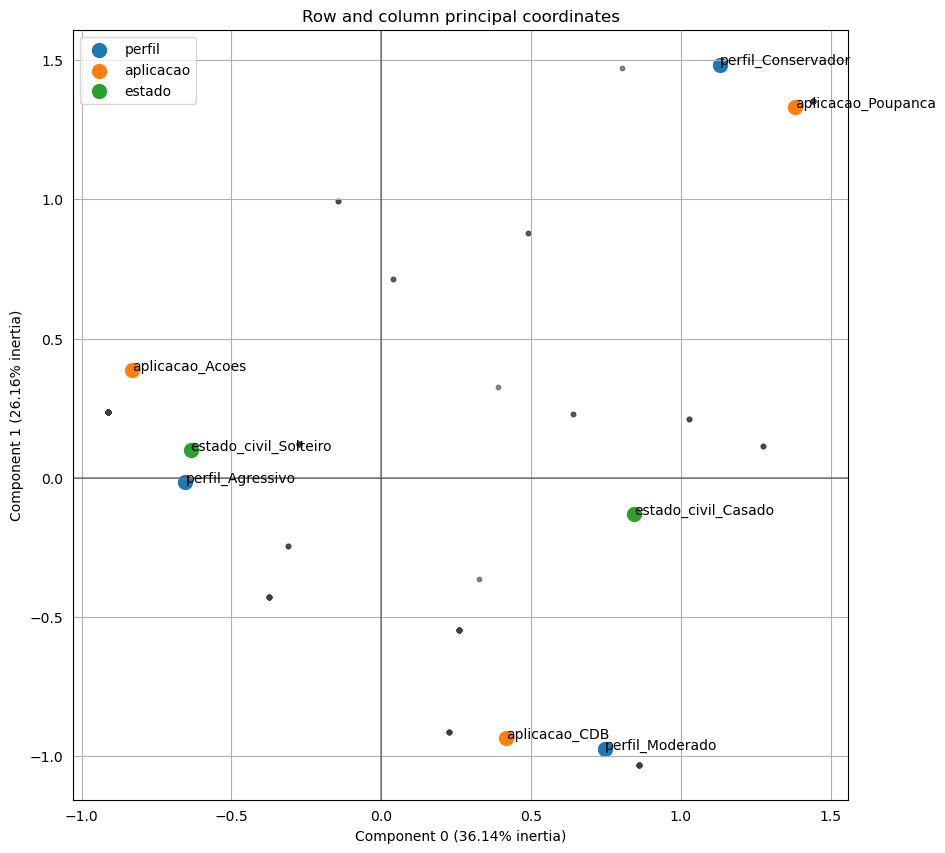

In [32]:
#Plota o mapa Perceptual
ax = mca.plot_coordinates(variaveis,
                         ax=None,
                         figsize= (10,10),
                         show_row_points=True,
                         show_column_labels=True,
                         show_row_labels=False,
                         column_points_size = 100,
                         legend_n_cols = 1)

## Mapa Interativo

In [33]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default='browser'

chart_df = pd.DataFrame({'obs_x':mca.row_coordinates(variaveis)[0],
                         'estudante':perfil_investidor['estudante'],
                         'obs_y': mca.row_coordinates(variaveis)[1]})

fig = go.Figure(data=go.Scatter(x=chart_df['obs_x'],
                                y=chart_df['obs_y'],
                                mode='markers',
                                name="Estudante",
                                text=chart_df['estudante']))

fig.add_trace(go.Scatter(
    x=mca.column_coordinates(variaveis)[0],
    mode='markers+text',
    name="Associação",
    marker={'size':12},
    y=mca.column_coordinates(variaveis)[1],
    textposition="top center",
    text=mca.column_coordinates(variaveis).index
))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title_text='Coordenadas das linhas e colunas'
)

fig.show()
